This is mostly me learning to understand how PyMC3 works and using it to find a line. <br>
https://docs.pymc.io/notebooks/getting_started.html <br>
https://docs.pymc.io/notebooks/api_quickstart.html

In [1]:
%matplotlib notebook
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [33]:
# True parameter values
# Two variable example
# Alpha is a addition constant
# Beta affects 
np.random.seed(212)
alpha = 15
beta = 2.3
sigma = 50

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.uniform(low=0, high=100, size=size)

# Simulate outcome variable
Y_actual = alpha + beta * X1
Y_observed = Y_actual + np.random.normal(0,sigma,size)

<IPython.core.display.Javascript object>


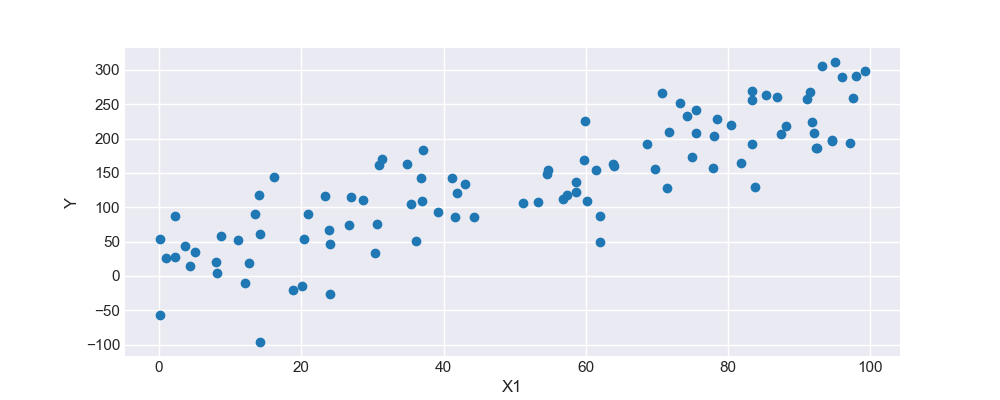

Text(0.5, 0, 'X1')

In [35]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,4))
axes.scatter(X1, Y_observed)
axes.set_ylabel('Y')
axes.set_xlabel('X1')

In [53]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=50)

    # Expected value of outcome
    mu = alpha + beta*X1

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y_observed)

The maximum a posteriori (MAP) estimate for a model, is the mode of the posterior distribution and is generally found using numerical optimization methods. This is often fast and easy to do, but only gives a point estimate for the parameters and can be biased if the mode isn’t representative of the distribution. PyMC3 provides this functionality with the find_MAP function.

Below we find the MAP for our original model. The MAP is returned as a parameter point, which is always represented by a Python dictionary of variable names to NumPy arrays of parameter values.

By default, find_MAP uses the Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm to find the maximum of the log-posterior but also allows selection of other optimization algorithms from the scipy.optimize module. For example, below we use Powell’s method to find the MAP.

In [54]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

logp = -537.87, ||grad|| = 6.5812: 100%|█████████████████████████████████████████████| 29/29 [00:00<00:00, 3912.85it/s]


{'alpha': array(6.81853573),
 'beta': array(2.51215805),
 'sigma_log__': array(3.83922689),
 'sigma': array(46.48951924)}

In [55]:
map_estimate_powell = pm.find_MAP(model=basic_model, method='powell')

map_estimate_powell

  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\scipy\optimize\_minimize.py:506: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)
logp = -537.53, ||grad|| = 0.002943: 100%|█████████████████████████████████████████| 288/288 [00:00<00:00, 4301.08it/s]


{'alpha': array(6.81833456),
 'beta': array(2.512161),
 'sigma_log__': array(3.83922606),
 'sigma': array(46.48948063)}

In [56]:
with basic_model:
    # 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|███████████████████████████████████████| 4000/4000 [00:02<00:00, 1340.75draws/s]
The acceptance probability does not match the target. It is 0.8896944234893341, but should be close to 0.8. Try to increase the number of tuning steps.


In [57]:
trace['alpha'][-5:]

array([ 1.27331465,  2.3810629 , 10.59410445,  3.10713608, 11.00335966])

<IPython.core.display.Javascript object>


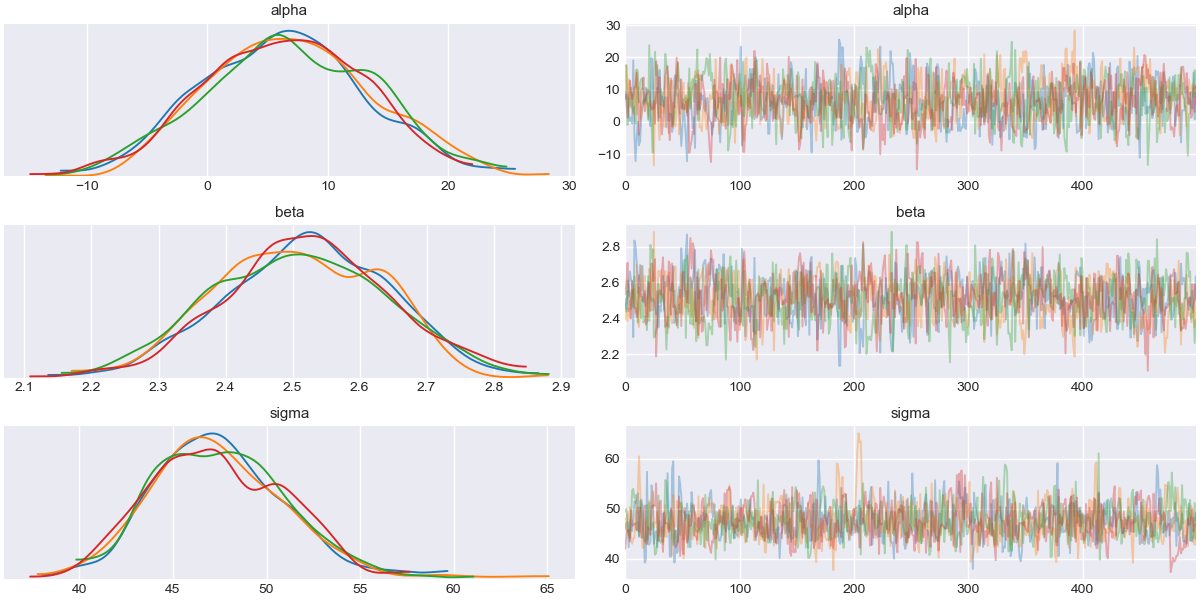

C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FCAE266C8>,
      dtype=object)

In [58]:
pm.traceplot(trace)

In [59]:
pm.summary(trace).round(2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,6.55,6.75,-5.77,18.87,0.22,0.16,946.0,894.0,946.0,1381.0,1.0
beta,2.51,0.12,2.29,2.74,0.00,0.00,1001.0,1001.0,999.0,1302.0,1.0
sigma,47.47,3.62,41.17,54.30,0.11,0.08,1077.0,1046.0,1132.0,757.0,1.0


In [61]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,6.553,6.749,-5.766,18.870,0.219,0.160,946.0,894.0,946.0,1381.0,1.0
beta,2.514,0.124,2.291,2.741,0.004,0.003,1001.0,1001.0,999.0,1302.0,1.0
sigma,47.468,3.619,41.169,54.296,0.110,0.079,1077.0,1046.0,1132.0,757.0,1.0


In [62]:
regression_alpha = pm.summary(trace)["mean"]["alpha"]
regression_beta = pm.summary(trace)["mean"]["beta"]

<IPython.core.display.Javascript object>


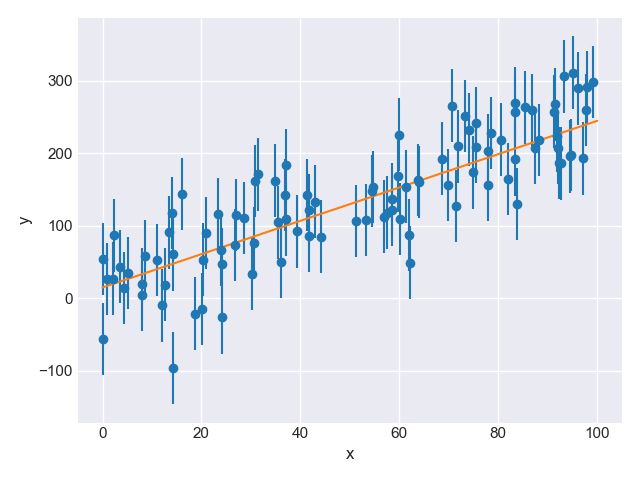

In [63]:
fig, ax = plt.subplots()

ax.errorbar(X1, Y_observed, 50, fmt='o')
ax.plot([0,100], 15 + 2.3*np.array([0,100]))
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.tight_layout()